In [16]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:16pt;}
div.text_cell_render.rendered_html{font-size:16pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:16pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
table.dataframe{font-size:16px;}
</style>
"""))

# 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 봄

In [18]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import LeakyReLU, ELU, ReLU
from matplotlib import pyplot as plt
# scale조정, train_test_split 등을 추가

In [19]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [7]:
print('타겟 :', data[1,0])
#print('이미지(784pixel=28*28) :', data[1, 1:].reshape(28,28))
image = data[1, 1:].reshape(28,28)
image.shape

타겟 : 0.0


(28, 28)

In [8]:
for row in image:
    for pixel in row:
        print("{:3.0f}".format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

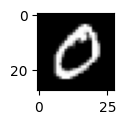

In [9]:
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')

In [ ]:
# 칼라사진 -> 흑백모드로 넘파이 배열로 읽기

In [10]:
%pip install opencv-python==4.8.1.78

   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   -------- ------------------------------- 8.4/38.1 MB 57.6 MB/s eta 0:00:01
   ---------- ----------------------------- 10.0/38.1 MB 29.6 MB/s eta 0:00:01
   ------------------ --------------------- 17.8/38.1 MB 34.0 MB/s eta 0:00:01
   -------------------- ------------------- 19.1/38.1 MB 24.6 MB/s eta 0:00:01
   ------------------------- -------------- 24.4/38.1 MB 24.9 MB/s eta 0:00:01
   ------------------------------- -------- 29.6/38.1 MB 24.7 MB/s eta 0:00:01
   ---------------------------------------  38.0/38.1 MB 28.4 MB/s eta 0:00:01
   ---------------------------------------- 38.1/38.1 MB 26.9 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
import cv2
image_gray = cv2.imread('c:/taro/ai/lecNote/05_DeepLearning/sample.jpg', cv2.IMREAD_GRAYSCALE)
image_gray.shape

(408, 612)

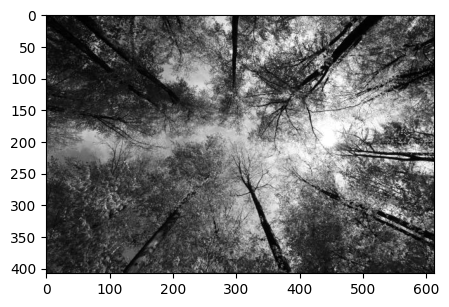

In [15]:
plt.figure(figsize=(5,5))
plt.imshow(image_gray, cmap='gray')

# 1. 데이터 생성 및 전처리

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

2


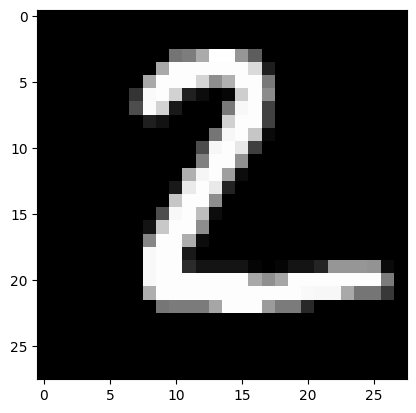

In [21]:
print(y_test[1])
plt.imshow(X_test[1], cmap='gray')
plt.show()

In [22]:
# Train데이터 6만개 -> train(5만개)+val(만개)로 분리. 한번만 실행
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [23]:
print('학습셋 :', X_train.shape, y_train.shape)
print('검증셋 :', X_val.shape, y_val.shape)
print('시험셋 :', X_test.shape, y_test.shape)

학습셋 : (50000, 28, 28) (50000,)
검증셋 : (10000, 28, 28) (10000,)
시험셋 : (10000, 28, 28) (10000,)


In [24]:
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X = X_val.reshape(-1, 784).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0

In [28]:
# 분류분석을 위한 타겟변수의 원핫인코딩
train_Y = to_categorical(y_train, 10) # 10은 카테고리수(안쓰면 자동 입력)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
train_Y.shape, val_Y.shape, test_Y.shape

((50000, 10), (10000, 10), (10000, 10))

In [29]:
# Train 5만 -> 700개, val 만->300개 (목적 : 수업시간 중 fit시간 절약)
train_idx = np.random.choice(50000,700) # 0~50000미만의 수 700개 뽑기
val_idx = np.random.choice(10000, 300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X = val_X[val_idx]
val_Y = val_Y[val_idx]

In [30]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape

((700, 784), (700, 10), (300, 784), (300, 10))

In [31]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2))
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [32]:
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy 
             optimizer='adam',
             metrics= ['accuracy']) # 평가지표

# 4. 모델 학습

In [33]:
%%time
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)

Epoch 1/200
7/7 [==============================] - 1s 30ms/step - loss: 2.3231 - accuracy: 0.0986 - val_loss: 2.2843 - val_accuracy: 0.1100
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 2.2708 - accuracy: 0.1286 - val_loss: 2.2573 - val_accuracy: 0.1500
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 2.2459 - accuracy: 0.1600 - val_loss: 2.2416 - val_accuracy: 0.1667
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 2.2306 - accuracy: 0.1657 - val_loss: 2.2308 - val_accuracy: 0.1767
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 2.2182 - accuracy: 0.1700 - val_loss: 2.2206 - val_accuracy: 0.1733
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 2.2060 - accuracy: 0.1914 - val_loss: 2.2110 - val_accuracy: 0.1767
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 2.1956 - accuracy: 0.1857 - val_loss: 2.2033 - val_accuracy: 0.1667
Epoch 8/200
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 1.5371 - accuracy: 0.4014 - val_loss: 1.6924 - val_accuracy: 0.3400
Epoch 60/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5313 - accuracy: 0.3986 - val_loss: 1.6875 - val_accuracy: 0.3467
Epoch 61/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5261 - accuracy: 0.4043 - val_loss: 1.6848 - val_accuracy: 0.3467
Epoch 62/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5202 - accuracy: 0.4029 - val_loss: 1.6812 - val_accuracy: 0.3500
Epoch 63/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5148 - accuracy: 0.4057 - val_loss: 1.6794 - val_accuracy: 0.3533
Epoch 64/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5103 - accuracy: 0.4029 - val_loss: 1.6767 - val_accuracy: 0.3500
Epoch 65/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5053 - accuracy: 0.4043 - val_loss: 1.6731 - val_accuracy: 0.3467
Epoch 66/200
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 1.3136 - accuracy: 0.4643 - val_loss: 1.5794 - val_accuracy: 0.3833
Epoch 118/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3104 - accuracy: 0.4671 - val_loss: 1.5769 - val_accuracy: 0.3867
Epoch 119/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3073 - accuracy: 0.4700 - val_loss: 1.5765 - val_accuracy: 0.3867
Epoch 120/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3046 - accuracy: 0.4643 - val_loss: 1.5775 - val_accuracy: 0.3833
Epoch 121/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3014 - accuracy: 0.4700 - val_loss: 1.5721 - val_accuracy: 0.3867
Epoch 122/200
7/7 [==============================] - 0s 5ms/step - loss: 1.2984 - accuracy: 0.4657 - val_loss: 1.5722 - val_accuracy: 0.3867
Epoch 123/200
7/7 [==============================] - 0s 5ms/step - loss: 1.2949 - accuracy: 0.4700 - val_loss: 1.5731 - val_accuracy: 0.3767
Epoch 124/200
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 1.1129 - accuracy: 0.5843 - val_loss: 1.5115 - val_accuracy: 0.4333
Epoch 176/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1104 - accuracy: 0.5900 - val_loss: 1.5104 - val_accuracy: 0.4300
Epoch 177/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1072 - accuracy: 0.5886 - val_loss: 1.5095 - val_accuracy: 0.4367
Epoch 178/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1049 - accuracy: 0.5900 - val_loss: 1.5104 - val_accuracy: 0.4400
Epoch 179/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1018 - accuracy: 0.5886 - val_loss: 1.5082 - val_accuracy: 0.4367
Epoch 180/200
7/7 [==============================] - 0s 5ms/step - loss: 1.0996 - accuracy: 0.5871 - val_loss: 1.5050 - val_accuracy: 0.4400
Epoch 181/200
7/7 [==============================] - 0s 5ms/step - loss: 1.0971 - accuracy: 0.5943 - val_loss: 1.5108 - val_accuracy: 0.4400
Epoch 182/200
7/7 [========

# 5. 모델 평가하기

In [34]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

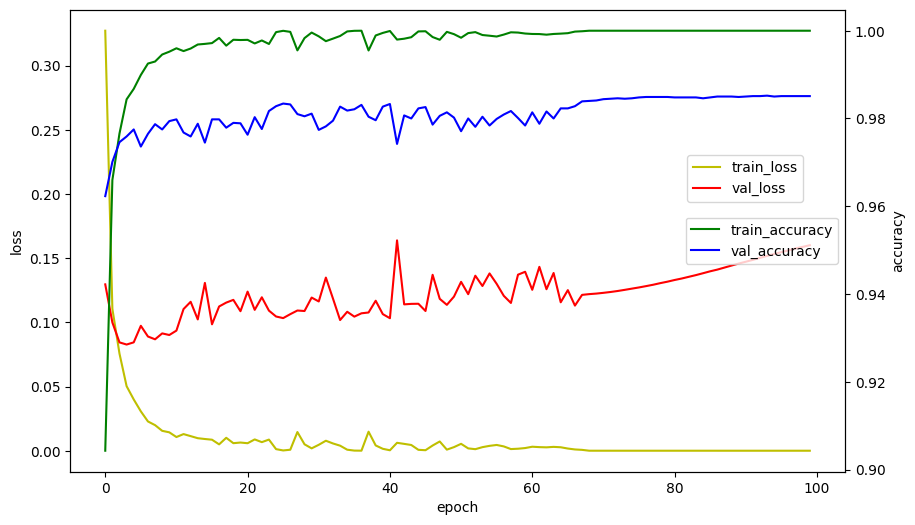

In [42]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [36]:
# 모델 평가(테스트셋)
loss_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_metrics[0])
print('accuracy :', loss_metrics[1])

loss : 1.4712272882461548
accuracy : 0.48179998993873596


# 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 모델 수정(레이어 추가, units수 증가)
- 과적합 방지(validation data 추가, 활성화 함수 relu계열, tanh, dropout)
- epochs 조정
- optimizer 변경

In [39]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X = X_val.reshape(-1, 784).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_Y = to_categorical(y_train, 10) # 10은 카테고리수(안쓰면 자동 입력)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
train_Y.shape, val_Y.shape, test_Y.shape
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=360, activation='relu'))
model.add(Dense(units=180, activation='sigmoid'))
model.add(Dense(units=90))
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과
model.add(Dense(units=10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy 
             optimizer='adam',
             metrics= ['accuracy']) # 평가지표
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=100,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 360)               282600    
                                                                 
 dense_9 (Dense)             (None, 180)               64980     
                                                                 
 dense_10 (Dense)            (None, 90)                16290     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 90)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                910       
                                                                 
Total params: 364,780
Trainable params: 364,780
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
500/500 [===========================

500/500 [==============================] - 2s 4ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.1200 - val_accuracy: 0.9802
Epoch 51/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.1315 - val_accuracy: 0.9771
Epoch 52/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.1219 - val_accuracy: 0.9800
Epoch 53/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.1363 - val_accuracy: 0.9781
Epoch 54/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.1283 - val_accuracy: 0.9804
Epoch 55/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.1381 - val_accuracy: 0.9784
Epoch 56/100
500/500 [==============================] - 2s 4ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.1300 - val_accuracy: 0.9799
Epoch

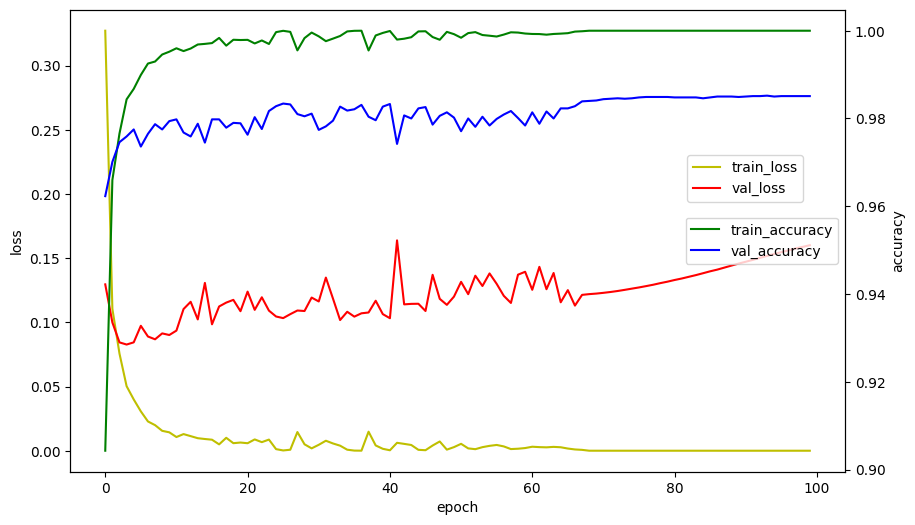

In [44]:
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [51]:
# 모델 평가
score = model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.9845


In [46]:
# 교차표
np.all(test_Y.argmax(axis=1) == y_test) # 실제값(y_test)

True

In [47]:
# model.predict(test_X).argmax(axis=1)
y_hat = np.argmax(model.predict(test_X), axis=1) # 예측값

313/313 [==============================] - 0s 1ms/step


In [50]:
pd.crosstab(y_test, y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,1,2,3,4,5,6,7,8,9
실제값,,,,,,,,,,
0,972,0,1,0,0,0,3,1,2,1
1,0,1128,1,1,0,0,2,0,3,0
2,4,1,1016,2,1,0,0,4,4,0
3,0,0,2,994,0,6,0,5,1,2
4,0,0,3,0,965,0,3,4,0,7
5,2,0,0,8,1,873,2,1,3,2
6,2,2,0,1,4,2,945,0,2,0
7,1,3,5,1,0,0,0,1008,4,6
8,0,0,2,5,2,3,1,3,955,3


In [52]:
# 틀린 갯수
10000-10000*score[1]

155.00009059906006

# ※ 콜백함수1:로그출력

In [53]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [54]:
%%time
# 특정 에포크마다 로그출력하도록 제한
class CustomHistory(Callback):
    def __init__(self): # 생성자함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        '1 epoch마다 자동 실행되는 함수'
        self.epoch += 1
        if self.epoch%10 == 0:
            print('epoch:{}, loss:{:.4f}, acc:{.4f}, val_loss:{.4f}, val_acc:{.4f}'.format(
                self.epoch, logs.get('loss'), logs.get('accuracy', '-'),
                logs.get('val_loss', '-'), logs.get('val_accuracy', '-')
            ))
customHistory = CustomHistory()    

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
val_idx   = np.random.choice(10000, 300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X   = val_X[val_idx]
val_Y   = val_Y[val_idx]
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0)

CPU times: total: 3 s
Wall time: 2.27 s


# ※ 콜백함수2 : EarlyStopping
- val_loss값이 늘어나면 지정한 epoche들이
-

In [56]:
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표
# monitor 기준으로 patience번 이상 안좋은 데이터가 나오면 조기 종료
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=3)
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlyStopping]) # 콜백함수

Epoch 1/50
7/7 [==============================] - 0s 23ms/step - loss: 2.2874 - accuracy: 0.1143 - val_loss: 2.2628 - val_accuracy: 0.1200
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 2.2492 - accuracy: 0.1357 - val_loss: 2.2167 - val_accuracy: 0.1767
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 2.2063 - accuracy: 0.1743 - val_loss: 2.1742 - val_accuracy: 0.2667
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 2.1658 - accuracy: 0.2557 - val_loss: 2.1362 - val_accuracy: 0.2867
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 2.1315 - accuracy: 0.2800 - val_loss: 2.1044 - val_accuracy: 0.3200
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 2.1020 - accuracy: 0.2886 - val_loss: 2.0767 - val_accuracy: 0.3300
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 2.0761 - accuracy: 0.2914 - val_loss: 2.0537 - val_accuracy: 0.3267
Epoch 8/50
7/7 [=================

# 콜백함수3

In [57]:
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표
# 모델 자동 자정 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder): # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(
                filepath= file,
                monitor='val_accuracy',
                save_best_only=True,
                mode = 'max',
                verbose=1)
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[]) # 콜백함수

Epoch 1/200
7/7 [==============================] - 0s 23ms/step - loss: 2.2761 - accuracy: 0.0914 - val_loss: 2.2654 - val_accuracy: 0.1133
Epoch 2/200
7/7 [==============================] - 0s 6ms/step - loss: 2.2294 - accuracy: 0.1586 - val_loss: 2.2294 - val_accuracy: 0.2133
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 2.1915 - accuracy: 0.2200 - val_loss: 2.1935 - val_accuracy: 0.2467
Epoch 4/200
7/7 [==============================] - 0s 5ms/step - loss: 2.1568 - accuracy: 0.2386 - val_loss: 2.1641 - val_accuracy: 0.2667
Epoch 5/200
7/7 [==============================] - 0s 5ms/step - loss: 2.1284 - accuracy: 0.2457 - val_loss: 2.1353 - val_accuracy: 0.2900
Epoch 6/200
7/7 [==============================] - 0s 6ms/step - loss: 2.1010 - accuracy: 0.2643 - val_loss: 2.1097 - val_accuracy: 0.3100
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 2.0799 - accuracy: 0.2686 - val_loss: 2.0875 - val_accuracy: 0.2767
Epoch 8/200
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 1.5502 - accuracy: 0.4643 - val_loss: 1.6373 - val_accuracy: 0.4400
Epoch 60/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5452 - accuracy: 0.4729 - val_loss: 1.6328 - val_accuracy: 0.4467
Epoch 61/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5398 - accuracy: 0.4814 - val_loss: 1.6288 - val_accuracy: 0.4500
Epoch 62/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5343 - accuracy: 0.4786 - val_loss: 1.6255 - val_accuracy: 0.4433
Epoch 63/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5295 - accuracy: 0.4757 - val_loss: 1.6214 - val_accuracy: 0.4500
Epoch 64/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5248 - accuracy: 0.4857 - val_loss: 1.6173 - val_accuracy: 0.4700
Epoch 65/200
7/7 [==============================] - 0s 5ms/step - loss: 1.5186 - accuracy: 0.4829 - val_loss: 1.6145 - val_accuracy: 0.4567
Epoch 66/200
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 1.3045 - accuracy: 0.5843 - val_loss: 1.4743 - val_accuracy: 0.5000
Epoch 118/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3011 - accuracy: 0.5857 - val_loss: 1.4727 - val_accuracy: 0.5000
Epoch 119/200
7/7 [==============================] - 0s 5ms/step - loss: 1.2980 - accuracy: 0.5814 - val_loss: 1.4711 - val_accuracy: 0.4933
Epoch 120/200
7/7 [==============================] - 0s 5ms/step - loss: 1.2946 - accuracy: 0.5857 - val_loss: 1.4681 - val_accuracy: 0.5000
Epoch 121/200
7/7 [==============================] - 0s 6ms/step - loss: 1.2912 - accuracy: 0.5886 - val_loss: 1.4660 - val_accuracy: 0.5000
Epoch 122/200
7/7 [==============================] - 0s 5ms/step - loss: 1.2876 - accuracy: 0.5900 - val_loss: 1.4646 - val_accuracy: 0.5000
Epoch 123/200
7/7 [==============================] - 0s 5ms/step - loss: 1.2843 - accuracy: 0.5914 - val_loss: 1.4631 - val_accuracy: 0.4967
Epoch 124/200
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 1.1476 - accuracy: 0.6257 - val_loss: 1.4088 - val_accuracy: 0.5067
Epoch 176/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1452 - accuracy: 0.6271 - val_loss: 1.4096 - val_accuracy: 0.5100
Epoch 177/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1439 - accuracy: 0.6229 - val_loss: 1.4071 - val_accuracy: 0.5100
Epoch 178/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1410 - accuracy: 0.6300 - val_loss: 1.4084 - val_accuracy: 0.5100
Epoch 179/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1395 - accuracy: 0.6271 - val_loss: 1.4065 - val_accuracy: 0.5133
Epoch 180/200
7/7 [==============================] - 0s 5ms/step - loss: 1.1371 - accuracy: 0.6257 - val_loss: 1.4069 - val_accuracy: 0.5100
Epoch 181/200
7/7 [==============================] - 0s 6ms/step - loss: 1.1356 - accuracy: 0.6286 - val_loss: 1.4070 - val_accuracy: 0.5133
Epoch 182/200
7/7 [========